In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split ,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

/home/lalit/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_train = pd.read_csv('Bigmart_train.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_test =pd.read_csv('Bigmart_test.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
df_train['datasets']='Train'
df_test['datasets']='Test'

In [5]:
df_combine = pd.concat([df_train,df_test], ignore_index=True)
print(len(df_train))
print(len(df_test))
print(len(df_combine))
df_combine.head()

8523
5681
14204


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,datasets
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train


In [6]:
df_combine.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [7]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
datasets                     14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [8]:
df_combine.describe(include = ['O'])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,datasets
count,14204,14204,14204,14204,14204,10188,14204,14204
unique,5,1559,16,10,3,3,4,2
top,Low Fat,DRM37,Fruits and Vegetables,OUT027,Tier 3,Medium,Supermarket Type1,Train
freq,8485,10,2013,1559,5583,4655,9294,8523


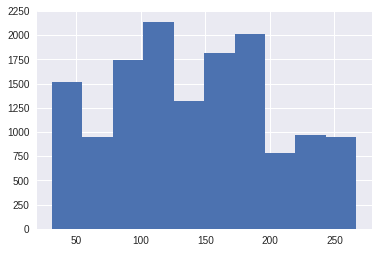

In [9]:
df_combine['Item_MRP'].hist(bins =10)

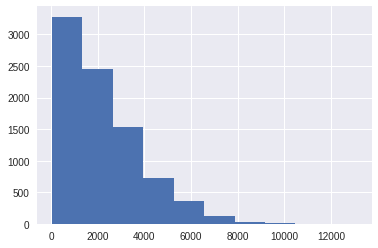

In [10]:
df_combine['Item_Outlet_Sales'].hist()

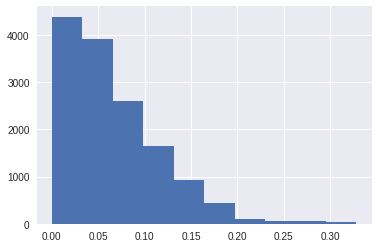

In [11]:
df_combine['Item_Visibility'].hist(bins = 10)

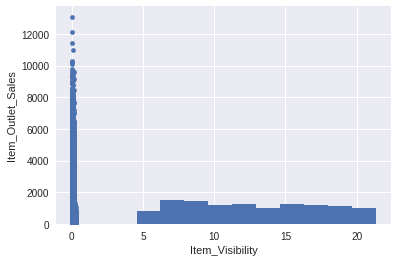

In [12]:
df_combine.plot.scatter('Item_Visibility','Item_Outlet_Sales')
df_combine['Item_Weight'].hist(bins=10)

In [13]:
# ITEM VISIBILITY 0 MAKES NO SENSE
# SO WE WILL REPLACE 0 VALUE WITH THE MEAN

In [14]:
#mask = df_combine.Item_Visibility == 0
#column_name = 'Item_Visibility'
#df_combine.loc[mask, column_name] = 0.0659527800739927

In [15]:
df_combine.ix[df_combine.Item_Visibility == 0, 'Item_Visibility'] = np.mean(df_combine['Item_Visibility'])

In [16]:
df_combine.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,datasets
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train


In [17]:
len(df_combine[df_combine['Item_Visibility'] == 0])

0

In [18]:
# REPLACE NULL VALUES OF 'Item_Weight' TO MEAN OF Item_Weight

In [19]:
df_combine['Item_Weight'].fillna(np.mean(df_combine['Item_Weight']), inplace=True)

In [20]:
# CHECKING NULL VALUE
len(df_combine[df_combine['Item_Weight'].isnull()])

0

In [21]:
df_cor1 = df_combine[['Item_MRP','Item_Outlet_Sales']]
df_cor1.corr(method='pearson', min_periods=1)

,Item_MRP,Item_Outlet_Sales
Item_MRP,1.000000,0.567574
Item_Outlet_Sales,0.567574,1.000000


In [22]:
df_cor2 = df_combine[['Item_Visibility','Item_Outlet_Sales']]
df_cor2.corr(method='pearson', min_periods=1)

,Item_Visibility,Item_Outlet_Sales
Item_Visibility,1.000000,-0.134141
Item_Outlet_Sales,-0.134141,1.000000


In [23]:
df_cor3 = df_combine[['Item_Weight','Item_Outlet_Sales']]
df_cor3.corr(method='pearson', min_periods=1)

,Item_Weight,Item_Outlet_Sales
Item_Weight,1.000000,0.011083
Item_Outlet_Sales,0.011083,1.000000


In [24]:
# UNIQUE VALUES OF CATEGORICAL VARIABLE
print('fat-content - {}\n'.format(df_combine['Item_Fat_Content'].unique()))

fat-content - ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']



In [25]:
# THREE NAME FOR LOW FAT SO HERE WE WILL HAVE TO REPLACE ALL TO 'LOW FAT'
df_combine.Item_Fat_Content[df_combine.Item_Fat_Content == 'low fat'] = 'Low Fat' 
df_combine.Item_Fat_Content[df_combine.Item_Fat_Content == 'LF'] = 'Low Fat'
df_combine.Item_Fat_Content[df_combine.Item_Fat_Content == 'reg'] = 'Regular'

/home/lalit/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/lalit/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/lalit/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
df_combine['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [27]:
print('1 - {}\n'.format(df_combine['Item_Identifier'].unique()))
print('2 - {}\n'.format(df_combine['Item_Type'].unique()))
print('3 - {}\n'.format(df_combine['Outlet_Location_Type'].unique()))
print('4 - {}\n'.format(df_combine['Outlet_Type'].unique()))
print('5 - {}\n'.format(df_combine['Outlet_Size'].unique()))
print('6 - {}\n'.format(df_combine['Outlet_Identifier'].unique()))

1 - ['FDA15' 'DRC01' 'FDN15' ..., 'NCF55' 'NCW30' 'NCW05']

2 - ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

3 - ['Tier 1' 'Tier 3' 'Tier 2']

4 - ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']

5 - ['Medium' nan 'High' 'Small']

6 - ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']



In [28]:
df_combine.groupby(['Outlet_Location_Type', 'Outlet_Identifier'])['Item_Outlet_Sales'].mean()



Outlet_Location_Type  Outlet_Identifier
Tier 1                OUT019                340.329723
                      OUT046               2277.844267
                      OUT049               2348.354635
Tier 2                OUT017               2340.675263
                      OUT035               2438.841866
                      OUT045               2192.384798
Tier 3                OUT010                339.351662
                      OUT013               2298.995256
                      OUT018               1995.498739
                      OUT027               3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [29]:
df_combine.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [30]:
df_combine.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].mean()

Item_Fat_Content
Low Fat    2157.711534
Regular    2224.561170
Name: Item_Outlet_Sales, dtype: float64

In [31]:
df_combine.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()

Item_Type
Baking Goods             1.265525e+06
Breads                   5.532372e+05
Breakfast                2.322990e+05
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Fruits and Vegetables    2.820060e+06
Hard Drinks              4.577934e+05
Health and Hygiene       1.045200e+06
Household                2.055494e+06
Meat                     9.175656e+05
Others                   3.255176e+05
Seafood                  1.488682e+05
Snack Foods              2.732786e+06
Soft Drinks              8.928977e+05
Starchy Foods            3.514013e+05
Name: Item_Outlet_Sales, dtype: float64

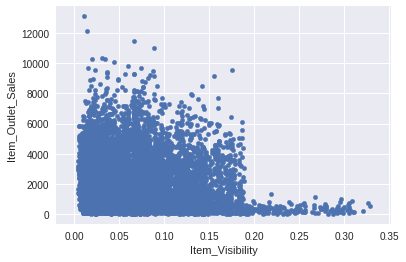

In [32]:
df_combine.plot.scatter('Item_Visibility','Item_Outlet_Sales')

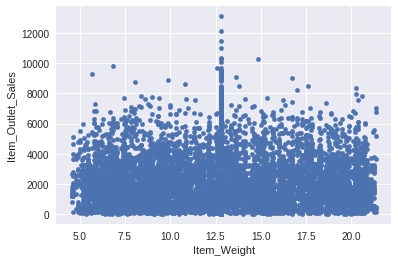

In [33]:
df_combine.plot.scatter('Item_Weight','Item_Outlet_Sales')

In [34]:
df_combine.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [35]:
df_combine.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [36]:
df_combine['Outlet_Establishment_Year'] = 2017 - df_combine['Outlet_Establishment_Year']

In [37]:
df_combine.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].mean()

Outlet_Establishment_Year
8     1995.498739
10    2340.675263
13    2438.841866
15    2192.384798
18    2348.354635
19     339.351662
20    2277.844267
30    2298.995256
32    2483.677474
Name: Item_Outlet_Sales, dtype: float64

In [38]:
df_cor4 = df_combine[['Outlet_Establishment_Year','Item_Outlet_Sales']]
df_cor4.corr(method='pearson', min_periods=1)

,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Establishment_Year,1.000000,0.049135
Item_Outlet_Sales,0.049135,1.000000


In [39]:
df_combine['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [40]:
map_element = { 'Baking Goods' : 'non_consume', 'Breads':'Food', 'Breakfast':'Food', 'Canned':'non_consume', 'Dairy':'non_consume',                    
'Frozen Foods' :'Food', 'Fruits and Vegetables':'Food', 'Hard Drinks':'Drink','Health and Hygiene':'non_consume', 'Household':'non_consume',                
'Meat':'Food', 'Others':'non_consume', 'Seafood':'Food', 'Snack Foods':'Food', 'Soft Drinks':'Drink', 'Starchy Foods':'Food'}

In [41]:
df_combine['Item_Type'] = df_combine['Item_Type'].map(map_element)

In [42]:
df_combine['Item_Type'].unique()

array(['non_consume', 'Drink', 'Food'], dtype=object)

In [43]:
df_combine['Outlet_Size'] = df_combine['Outlet_Size'].fillna('Medium')

In [44]:
df_combine.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'datasets'],
      dtype='object')

In [45]:
del df_combine['Item_Identifier']

In [46]:
del df_combine['Outlet_Identifier']

In [47]:
from sklearn.feature_extraction import DictVectorizer

In [48]:
Item_Fat_Content_df = pd.get_dummies(df_combine['Item_Fat_Content'])
Item_Fat_Content_df


,Low Fat,Regular
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1
6,0,1
7,1,0
8,0,1
9,0,1


In [49]:
df_combine = pd.concat([df_combine,Item_Fat_Content_df], axis=1)


In [50]:
Item_Type_df = pd.get_dummies(df_combine['Item_Type'])
df_combine = pd.concat([df_combine,Item_Type_df], axis=1)

In [51]:
Outlet_Location_Type_df = pd.get_dummies(df_combine['Outlet_Location_Type'])
df_combine = pd.concat([df_combine,Outlet_Location_Type_df], axis=1)

In [52]:
Outlet_Size_df = pd.get_dummies(df_combine['Outlet_Size'])
df_combine = pd.concat([df_combine,Outlet_Size_df], axis=1)
 

In [53]:
Outlet_Type_df = pd.get_dummies(df_combine['Outlet_Type'])
df_combine = pd.concat([df_combine,Outlet_Type_df], axis=1)

In [54]:
df_combine.drop(['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type'], axis=1, inplace=True)

In [55]:
df_combine = df_combine[['Item_MRP','Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'datasets', 'Low Fat', 'Regular',
       'Drink', 'Food', 'non_consume', 'Tier 1',
       'Tier 2', 'Tier 3', 'High', 'Medium', 'Small', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3','Item_Outlet_Sales',]]

In [56]:
df_combine.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,datasets,Low Fat,Regular,Drink,Food,non_consume,...,Tier 2,Tier 3,High,Medium,Small,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Outlet_Sales
0,249.8092,0.016047,9.30,18,Train,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,3735.1380
1,48.2692,0.019278,5.92,8,Train,0,1,1,0,0,...,0,1,0,1,0,0,0,1,0,443.4228
2,141.6180,0.016760,17.50,18,Train,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,2097.2700
3,182.0950,0.065953,19.20,19,Train,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,732.3800
4,53.8614,0.065953,8.93,30,Train,1,0,0,0,1,...,0,1,1,0,0,0,1,0,0,994.7052


In [57]:
train_data = df_combine[df_combine['datasets'] ==  'Train']
del train_data['datasets']
train_data = train_data.values
train_data_x = train_data[:,:-1]
train_data_y = train_data[:,-1]

In [58]:
test_data = df_combine[df_combine['datasets'] ==  'Test']
del test_data['datasets']
test_data = test_data.values
test_data_x = test_data[:,:-1]
test_data_y = test_data[:,-1]

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scale1 = StandardScaler()
train_x = scale1.fit_transform(train_data_x)
test_x = scale1.fit_transform(test_data_x)

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(train_data_x)
X_test_quadratic = quadratic_featurizer.transform(test_data_x)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()
model_fit = model.fit(train_x,train_data_y)

In [65]:
score = model_fit.score(train_x, train_data_y)
print("Mean accuracy of LinearRegression is : {0}".format(score))

Mean accuracy of LinearRegression is : 0.563095031898408


In [75]:
quardetic_model = LinearRegression()
quard_fit =quardetic_model.fit(X_train_quadratic,train_data_y)

In [78]:
score = quard_fit.score(X_train_quadratic, train_data_y)
print("Mean accuracy of LinearRegression is : {0}".format(score))
prediction = quardetic_model.predict(X_test_quadratic)
print(prediction)

Mean accuracy of LinearRegression is : 0.6091706202232836
[ 1735.08965968  1507.70261105   555.04325487 ...,  1841.671095
  3728.20154425  1423.23232291]


In [90]:
from sklearn import svm
clf = svm.SVR(kernel='linear', C=1)
clf_fit = clf.fit(train_x,train_data_y) 
scores = cross_val_score(clf, train_x, train_data_y, cv=5)
scores  

array([ 0.51339262,  0.51467097,  0.5213491 ,  0.51741614,  0.52023507])

In [72]:
predict = clf_fit.predict(test_x)

In [73]:
print(predict)

[ 1751.04621806  1738.34747249  1583.19105915 ...,  1789.56086782
  1948.62476565  1715.80533129]
